<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Hw5_(21)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits['DESCR'])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
df = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [9]:
print(X_train.shape)

(1347, 64)


In [10]:
print(y_train.shape)


(1347,)


In [11]:
print(X_test.shape)


(450, 64)


In [12]:
print(y_test.shape)


(450,)


In [13]:
logisticRegr = LogisticRegression()


In [14]:
logisticRegr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
logisticRegr.predict(X_test[0].reshape(1,-1))


array([2])

In [16]:
logisticRegr.predict(X_test[0:10])


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [17]:
logisticRegr.predict(X_test[0:10])


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [18]:
predictions = logisticRegr.predict(X_test)


In [19]:
predictions.shape


(450,)

In [21]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9511111111111111


In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [23]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [24]:
mnist.data.shape

(70000, 784)

In [25]:
mnist.target.shape

(70000,)

In [26]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [27]:
print(train_img.shape)

(60000, 784)


In [28]:
print(train_lbl.shape)


(60000,)


In [29]:
print(test_img.shape)


(10000, 784)


In [30]:
print(test_lbl.shape)


(10000,)


In [51]:
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [32]:
pca = PCA(.95)

In [33]:
pca.fit(train_img)


PCA(n_components=0.95)

In [34]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

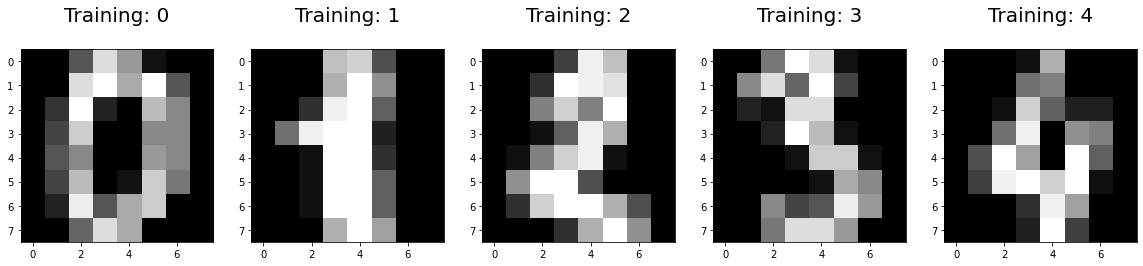

In [35]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

Logistic regression


In [36]:
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [37]:
logisticRegr.fit(train_img, train_lbl)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
logisticRegr.predict(test_img[0:10])


array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [39]:
predictions = logisticRegr.predict(test_img)


In [40]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9201


In [41]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [43]:
logisticRegr.intercept_

array([-1.86342524, -4.12229386,  2.18536539,  2.34558947, -1.4506696 ,
        2.69740758, -1.36287839, -1.97405385,  3.41119427,  0.13376422])

In [42]:
logisticRegr.n_iter_[0]

100

In [52]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [54]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [55]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(1797, 64)

In [56]:
x_pca.shape


(1797, 2)

Text(0, 0.5, 'Columns')

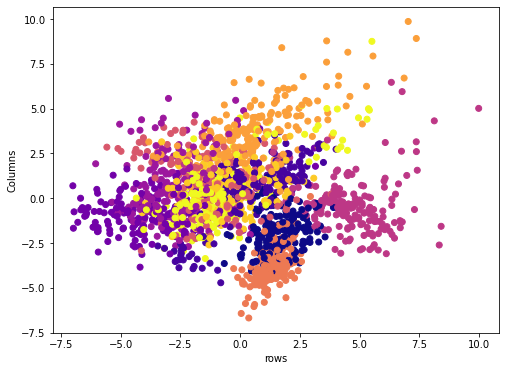

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=digits['target'],cmap='plasma')
plt.xlabel('rows')
plt.ylabel('Columns')

In [58]:
pca.components_


array([[-2.23761023e-18, -1.82234107e-01, -2.85868912e-01,
        -2.20370590e-01,  2.51704611e-02,  9.49883189e-03,
         5.24776343e-02,  6.26953950e-02, -3.47069772e-02,
        -2.45533873e-01, -2.29151810e-01,  1.07943867e-01,
        -3.62022609e-02, -3.87102338e-02,  8.37819509e-02,
         9.27748768e-02, -1.66995257e-02, -1.36716172e-01,
         6.30512288e-02,  1.22879058e-01, -1.48194191e-01,
         2.34846791e-02,  1.71199649e-01,  1.04207378e-01,
         3.94843102e-03,  1.16389475e-01,  1.88204861e-01,
        -6.58606209e-02, -1.43533381e-01,  1.28206074e-01,
         1.80619767e-01,  5.27083522e-02,  0.00000000e+00,
         2.38901801e-01,  2.35006181e-01,  5.09152207e-03,
         1.31082825e-02,  1.59114764e-01,  1.29393084e-01,
         0.00000000e+00,  5.55987593e-02,  1.87157056e-01,
         1.53534846e-01,  4.68260379e-02,  1.10892285e-01,
         1.07209177e-01, -1.79265350e-02,  2.27253435e-03,
         2.88171485e-02, -4.08674641e-02, -1.10269314e-0

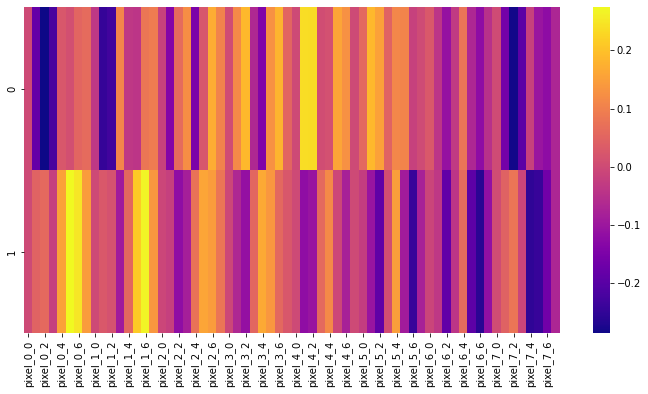

In [59]:
df_comp = pd.DataFrame(pca.components_,columns=digits['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)